<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           946 non-null    object
 1   author          946 non-null    object
 2   likes           946 non-null    object
 3   comments        946 non-null    int64 
 4   story           946 non-null    object
 5   timestamp       946 non-null    object
 6   verdict         946 non-null    object
 7   user_comment1   946 non-null    object
 8   user_comment2   946 non-null    object
 9   user_comment3   944 non-null    object
 10  user_comment4   944 non-null    object
 11  user_comment5   944 non-null    object
 12  user_comment6   944 non-null    object
 13  user_comment7   944 non-null    object
 14  user_comment8   944 non-null    object
 15  user_comment9   943 non-null    object
 16  user_comment10  943 non-null    object
dtypes: int64(1), object(16)
memory usage: 125.8+ KB
17.6k 

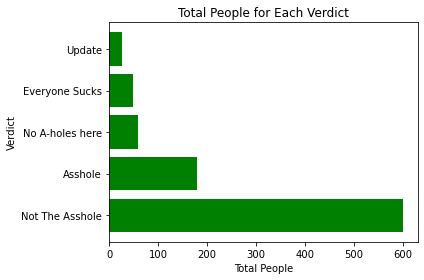

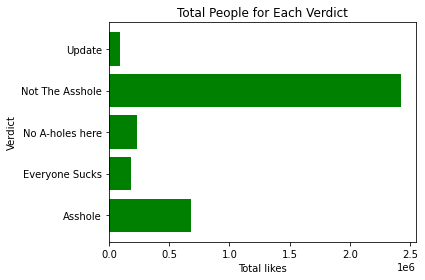

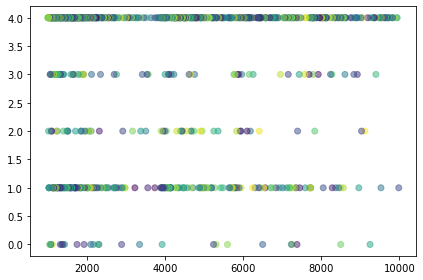

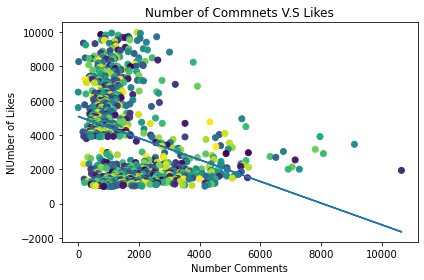

In [3]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

names=['title', 'author', 'likes', 'comments', 'story', 'timestamp', 'verdict']
for i in range(1, 11):
    comment_number = "user_comment{}".format(i)
    names.append(comment_number)
df = pd.read_csv('reddit_aita.csv', names=names)


# In[2]:


df

# In[3]:


df.info(verbose=True)


# In[4]:


#CLEANING DATA 
#"Likes" must be a numeric type. Besides, as we can 
#see below we have some values that end in K we have to transform into a string that can be converted into a numeric 

print(df["likes"].value_counts())


# In[5]:


def with_outk(my_str):
    if my_str == None:
        return None
    elif my_str[len(my_str)-1] == "k": #getting rid of the k. 
        return str(float(my_str[0:len(my_str)-1])*100)
    else: 
        return my_str 
    
df["likes"] = df["likes"].apply(lambda x : with_outk(x))


# In[6]:


#Now we should be able to change the type of the column "likes"

df["likes"] = pd.to_numeric(df["likes"])


# In[7]:


df.info()


# In[8]:


#WARNING 1 Transform the date into columns 

#Now we proceed to clean the verdict column. Too many strings representing the same thing 

print(df["verdict"].value_counts())


# In[9]:


#Before plotting 

#First we union all the A-hole verdicts 
df["verdict"]= df["verdict"].replace(["Record Setting Asshole", "META Asshole" ], "Asshole")

#Second the not A-holes are unified 
df["verdict"]= df["verdict"].replace(["Not the A-hole", "not the a-hole", "Not the A-hole (oof)"  ], "Not The Asshole")

#third, joining fake stories
df["verdict"]= df["verdict"].replace(["Probably Fake", "probably fake", "Fake Story", "Shitpost" ], "Fake")

df["verdict"]= df["verdict"].replace(["Update", "UPDATE", "Update" ], "Update")

df["verdict"]= df["verdict"].replace(["Everyone Sucks", "everyone sucks" ], "Everyone Sucks")


#WE START REMOVEING SOME ROWS...

#Out of the almost 1,000 stories in our dataset, only 5 are believed to be fake stories.
#Thankfully, the subreddit is already filtered by the moderators so the minimal missing data is negligable 
index = df[ df['verdict'] == "Fake" ].index
df.drop(index , inplace=True)


#The next step in cleaning our data is to remove missing data. This includes unhelpful verdicts like "weeabo h8r", "Not enough info", and "no flair"
#We will also ignore posts marked as "META" because those posts are discussions about the state of the subreddit and do not contain any stories to be judged
#We tried the code below but the boolean expression was hard to understand so we extended it in separate steps
#df.drop(df[ (df['verdict'] == "No-Flair") or (df['verdict'] == "weeabo h8r")].index, inplace=True)

index = df[ df['verdict'] == "No-Flair" ].index
df.drop(index , inplace=True)

index = df[ df['verdict'] == "weeabo h8r" ].index
df.drop(index , inplace=True)


index = df[ df['verdict'] == "Not enough info" ].index
df.drop(index , inplace=True)

index = df[ df['verdict'] == "META" ].index
df.drop(index , inplace=True)

index = df[ df['verdict'] == "Actually Meta" ].index
df.drop(index , inplace=True)


# In[10]:


#We noticed a small problem with the "update" verdict that allowed a white space character to get in the way
print(df["verdict"].unique())

#So, we decided to drop the white space characters and combine all the different versions of "update ..." together 
df["verdict"]= df["verdict"].replace(["Update "], "Update")


# In[11]:


#Exploration 0 
#We verify our unique values and everything works fine
verdict = df["verdict"].value_counts()

fig, ax = plt.subplots()
ax.barh(verdict.index, verdict, color = 'g')

ax.set( xlabel='Total People', ylabel='Verdict',
       title='Total People for Each Verdict')

#The subreddit AITA is a place where users can submit their personal stories to be judged by other reddit users for fault
#The original poster, or OP, of each story should be posting something controversial with approximately a 50/50 split on who is the asshole of the story
#After looking at the skew of verdicts in our dataset, we can quickly see the abundance of "Not the asshole" verdicts
#meaning that OP is not at fault. So, why is the dataset heavily skewed in that direction? The most likely answer is
#that most users on the subreddit already know the verdict before making their post and they are only seeking validation
#Another less likely possibility is that people are biased in the way they tell stories, leading others to believe 
#that they are innocent, even if they are not. 

#We also notice that the two verdicts "everyone sucks" and "no a-holes here" are equally likely, which leads us to
#the conclusion that when the story does not have a clear cut party at fault, the results actually indicate a lack 
#of bias in the story. Since the results have heavily favored OP, we actually thought that "no a-holes here" would be
#a more likely verdict than "everyone sucks", since that would have also favored OP due to the tendency for seeking
#validation.

#warinig: make it nicer and a pie chart 


# In[15]:


#Exploration 1 
#Total likes V.S Verdicts 

#Note: use total likes avg  total likes/ total people for ach category 
totals_by_verdict = df.groupby(['verdict']).sum() #return data frame 

fig, ax = plt.subplots()
ax.barh(totals_by_verdict.index, totals_by_verdict["likes"], color = 'g')

ax.set( xlabel='Total likes', ylabel='Verdict',
       title='Total People for Each Verdict')

#WARNING DIFFERENT COLORS FOR DIFFERENT TYPES 

#totals_by_verdict["likes"].index
#totals_by_verdict["Update"]


# In[13]:



#Warning we need a level for each row in the plot for each type of verdict, x-axis 
fig, ax = plt.subplots()
verdict_ints = { "Update" : 0, 'Asshole' : 1, 'Everyone Sucks' : 2, 'No A-holes here': 3, 'Not The Asshole':4 }
df["verdict_int"] = df["verdict"].apply(lambda x: verdict_ints[x])
ax.scatter(df["likes"], df["verdict_int"], c=np.random.randint(0, 1000, 913),alpha=.5)


# In[16]:


#Exploration 2: Number of components and number likes 


plt.rcParams.update({'figure.autolayout': True})
fig, ax = plt.subplots()
ax.scatter(df["comments"], df["likes"], c=np.random.randint(0, 100, 913)) 
#adding linear regression 
m, b = np.polyfit(df["comments"], df["likes"] , 1)
plt.plot(df["comments"], m*df["comments"]+b)

plt.xlabel('Number Comments')
plt.ylabel('NUmber of Likes')
plt.title("Number of Commnets V.S Likes")


# In[ ]:

curseWordArray = ["bitch", "pussy", "fuck", "damn", "shit", "wtf", "mf", "dick", "bastard", "fucking", "fuckin", "fkn"]

def cwComment1(row):  
    if isinstance(row['user_comment1'], str):
        wordsList = row['user_comment1'].split()
        count = 0
        for word in wordsList:
            if word in curseWordArray:
                count = count + 1
        return count 

def cwComment2(row):  
    if isinstance(row['user_comment2'], str):
        wordsList = row['user_comment2'].split()
        count = 0
        for word in wordsList:
            if word in curseWordArray:
                count = count + 1
        return count 

def cwComment3(row):  
    #print("####################")
    #print(row['user_comment3'])
    #print("####################")
    if isinstance(row['user_comment3'], str):
        wordsList = row['user_comment3'].split()
        count = 0
        for word in wordsList:
            if word in curseWordArray:
                count = count + 1
        return count 

def cwComment4(row):  
    if isinstance(row['user_comment4'], str):
        wordsList = row['user_comment4'].split()
        count = 0
        for word in wordsList:
            if word in curseWordArray:
                count = count + 1
        return count  

def cwComment5(row):  
    if isinstance(row['user_comment5'], str):
        wordsList = row['user_comment5'].split()
        count = 0
        for word in wordsList:
            if word in curseWordArray:
                count = count + 1
        return count  

def cwComment6(row):  
       if isinstance(row['user_comment6'], str):
        wordsList = row['user_comment6'].split()
        count = 0
        for word in wordsList:
            if word in curseWordArray:
                count = count + 1
        return count  

def cwComment7(row):  
       if isinstance(row['user_comment7'], str):
        wordsList = row['user_comment7'].split()
        count = 0
        for word in wordsList:
            if word in curseWordArray:
                count = count + 1
        return count  

def cwComment8(row):  
        if isinstance(row['user_comment8'], str):
            wordsList = row['user_comment8'].split()
            count = 0
            for word in wordsList:
                if word in curseWordArray:
                    count = count + 1
            return count  

def cwComment9(row):  
    if isinstance(row['user_comment9'], str):
        wordsList = row['user_comment9'].split()
        count = 0
        for word in wordsList:
            if word in curseWordArray:
                count = count + 1
        return count  

def cwComment10(row):  
    if isinstance(row['user_comment10'], str):
        wordsList = row['user_comment10'].split()
        count = 0
        for word in wordsList:
            if word in curseWordArray:
                count = count + 1
        return count  

df['curse words user_comment1'] = df.apply(lambda row: cwComment1(row), axis=1)
df['curse words user_comment2'] = df.apply(lambda row: cwComment2(row), axis=1)
df['curse words user_comment3'] = df.apply(lambda row: cwComment3(row), axis=1)
df['curse words user_comment4'] = df.apply(lambda row: cwComment4(row), axis=1)
df['curse words user_comment5'] = df.apply(lambda row: cwComment5(row), axis=1)
df['curse words user_comment6'] = df.apply(lambda row: cwComment6(row), axis=1)
df['curse words user_comment7'] = df.apply(lambda row: cwComment7(row), axis=1)
df['curse words user_comment8'] = df.apply(lambda row: cwComment8(row), axis=1)
df['curse words user_comment9'] = df.apply(lambda row: cwComment9(row), axis=1)
df['curse words user_comment10'] = df.apply(lambda row: cwComment10(row), axis=1)



#def printed(row):  
    #print(row['user_comment1'])
#df.apply(lambda row: printed(row), axis=1)

#Note to Robert: normalize likes and number of comonent and make plot above 

print(df)